# Final_Notebook: Project 2

## Overview:

In this project, we sorted housing sales data from King County. We did this to help advise our client what they should do to increase the sale value of their price. We filtered the data to explore what information pertains to middle class homes and then compared different variables to ascertain what steps are client needs to take.

## Business Problem:
Our client buys, renovates, and then sells houses to make money. Recently, they bought a middle-class priced home and have come to us to ask what changes they could make to the house to sell it at the highest value.

## Data Understanding

In [1]:
# Initial imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore
from utils import evaluate_model

In [2]:
# Read in data
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


## Data Preparation

The house that our client has bought is a middle class home. Therefore, we should look at data pertaining to middle class homes. We will use the data within of standard deviation of the average price of houses in df.

In [7]:
zscore(df['price'])

array([-0.86671627, -0.00625157, -0.98077344, ..., -0.37618606,
       -0.38190525, -0.58606486])

In [8]:
df['price_z'] = zscore(df['price'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_z
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-0.866716
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,-0.006252
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,-0.980773
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.173409
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-0.082471


In [9]:
# Filtering out data more than one standard deviation from mean
price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]
price_z_df.head()

<ipython-input-9-fbf36471ffac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  price_z_df = df[df['price_z'] <= 1][df['price_z'] >=-1]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_z
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,-0.866716
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,-0.006252
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,-0.980773
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0.173409
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,-0.082471


The next thing we are going to do is drop irrelevant columns. We are assuming the company already bought a house, so we are going to drop variables that they do not have control over such as view and waterfront. However, we are keeping zipcode to encode it later to increase the accuracy of our models.

In [10]:
#Dropping irrelevant columns
df_new = price_z_df.drop(columns = 
                         ['id', 'date', 'lat', 'long', 'waterfront', 'view', 'yr_built', 'yr_renovated'])

Not all of our columns are comparable as they are right now. Sqft_basement, grade, and condition are objects instead of floats or integers. We need to change these strings to have numeric values.

In [11]:
#Turning sqft_basement into int instead of str
df_new['sqft_basement'] = df_new['sqft_living'] - df_new['sqft_above']

In [12]:
#Turning condition into int
df_new['condition'] = df_new['condition'].replace({'Average': 3, 'Very Good': 5, "Poor": 1, "Fair": 2, 'Good': 4}).astype(int)

In [13]:
df_new['grade'] = df_new['grade'].str[0:2].astype(int)

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19205 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19205 non-null  float64
 1   bedrooms       19205 non-null  int64  
 2   bathrooms      19205 non-null  float64
 3   sqft_living    19205 non-null  int64  
 4   sqft_lot       19205 non-null  int64  
 5   floors         19205 non-null  float64
 6   condition      19205 non-null  int32  
 7   grade          19205 non-null  int32  
 8   sqft_above     19205 non-null  int64  
 9   sqft_basement  19205 non-null  int64  
 10  zipcode        19205 non-null  int64  
 11  sqft_living15  19205 non-null  int64  
 12  sqft_lot15     19205 non-null  int64  
 13  price_z        19205 non-null  float64
dtypes: float64(4), int32(2), int64(8)
memory usage: 2.1 MB


## Baseline Modeling

All of the columns we are dealing with have been converted to int. Now, it is time to model. We will begin our modeling by making two baseline models. The first model will compare price and sqft_living.

In [15]:
# Baseline model comparing price and sqft_living
X = df_new['sqft_living']
Y = df_new['price']

In [16]:
# Next, we are going to train our first baseline model. 
X_train, X_test, y_train, y_test = train_test_split(
      X, Y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     6536.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:23:01   Log-Likelihood:            -1.9184e+05
No. Observations:               14403   AIC:                         3.837e+05
Df Residuals:                   14401   BIC:                         3.837e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.946e+05   3520.788     55.278      

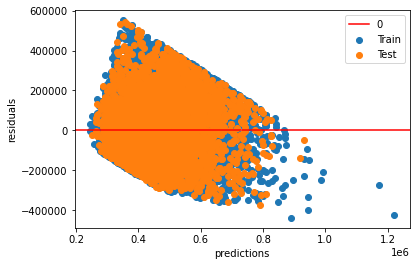

(10241    447982.584429
 2558     514583.693775
 5470     425324.475064
 4048     408845.850071
 6460     397860.100076
              ...      
 12623    388247.568830
 13372    587364.287494
 6052     385501.131331
 960      333318.818854
 17731    439056.662558
 Length: 14403, dtype: float64,
 3627     588737.506243
 10574    373142.162587
 16490    362156.412591
 4889     358036.756343
 1684     499478.287532
              ...      
 7316     393740.443828
 9584     373142.162587
 13320    380282.900084
 11078    620321.537479
 18803    525569.443771
 Length: 4802, dtype: float64,
 const          194623.725164
 sqft_living       137.321875
 dtype: float64)

In [17]:
evaluate_model(X_train, X_test, y_train, y_test)

Our first model did not have a very high R^2 score. Our next model will look at the correlation of house sale price and the number of bathrooms.

In [18]:
# 2nd baseline model comparing price and number of bathrooms
X = df_new['bathrooms']
Y = df_new['price']

In [19]:
# Here we are going to train our second baseline model
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.25, random_state=42)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2648.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:23:06   Log-Likelihood:            -1.9332e+05
No. Observations:               14403   AIC:                         3.866e+05
Df Residuals:                   14401   BIC:                         3.867e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.538e+05   4257.500     59.612      0.0

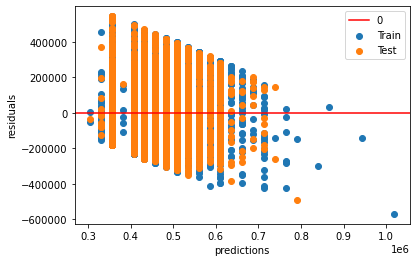

(10241    559818.639075
 2558     559818.639075
 5470     457812.281084
 4048     457812.281084
 6460     355805.923092
              ...      
 12623    457812.281084
 13372    483313.870581
 6052     406809.102088
 960      457812.281084
 17731    483313.870581
 Length: 14403, dtype: float64,
 3627     432310.691586
 10574    432310.691586
 16490    432310.691586
 4889     406809.102088
 1684     483313.870581
              ...      
 7316     355805.923092
 9584     355805.923092
 13320    483313.870581
 11078    508815.460079
 18803    559818.639075
 Length: 4802, dtype: float64,
 const        253799.565101
 bathrooms    102006.357991
 dtype: float64)

In [20]:
evaluate_model(X_train, X_test, y_train, y_test)

Our baseline models are now finished. Neither had incredible R^2 scores; however, with so much of the data excluded, it is unlikely we would see good numbers. Our next step is going to be adding more variables to our models

## Modeling

Our first model compared the ratio of the sqft. of the lot compared to sqft. of the total living space to price. We wanted to see if certain ratios could impact the price. If there was a relationship, we could tell our client to model the house to take up more or less of the lot with his renovations.

In [21]:
#Let's compare different types of sqft living. Is it better to expand the house to take up more of the lot? 
X = df_new['sqft_living'] / df_new['sqft_lot']
y = df_new['price']

In [118]:
def preprocess(X, Y, cat_cols = [], scale =True):
    """
    This function defines our train-test split and also scales it. Furthermore, if cat_cols has a length greater than one,
    we will one hot encode cat_cols. We use this for when our models utilize the column 'zipcode'. By calling this function
    throughout the notebook, we will be able to have more legible code."""
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.25, random_state=42)
    
    feat_names = []
    
    if len(cat_cols) > 0:
        # Encode create an encoder object. This will help us to convert
        # categorical variables to new columns
        encoder = OneHotEncoder(handle_unknown='error',
                                drop='first')

        # Create an columntransformer object.
        # This will help us to merge transformed columns
        # with the rest of the dataset.
        ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                               remainder='passthrough', sparse_threshold=0)
        ct.fit(X_train)
        X_train = ct.transform(X_train)
        X_test = ct.transform(X_test)
        feat_names = ct.get_feature_names()
    
    
    if scale == True:
        
    
        # Scale
            # scale our data - now let's use a Min Max Scaler because binaries!
        scaler = MinMaxScaler()

        # train on train data
        scaler.fit(X_train)

        # transform both train and test data
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
      
    return X_train, X_test, y_train, y_test, feat_names

In [23]:
X_train_scaled, X_test_scaled, y_train, y_test, feat_names = preprocess(X.values.reshape(-1, 1), Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     431.8
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.59e-94
Time:                        15:23:21   Log-Likelihood:            -1.9432e+05
No. Observations:               14403   AIC:                         3.887e+05
Df Residuals:                   14401   BIC:                         3.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.254e+05   2263.757    187.929      0.0

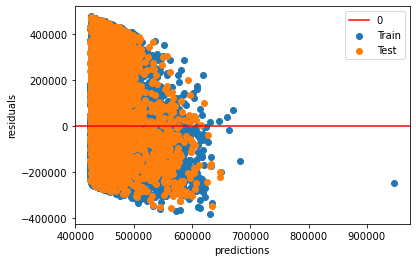

In [24]:
train_preds, test_preds, model_params = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

We found there to be a very low score for how the ratio of lot to house influences price. Housing price fluctuates frequently regardless of the ratio. Our next model will incorporate condition, grade, sqft living, and the number of bathrooms. This will help explore the idea of expanding the house using higher grade materials to increase the saleprice

In [25]:
used_cols = ['condition', 'grade', 'sqft_living', 'bathrooms']
X = df_new[used_cols]
Y = df_new['price']

In [26]:
X_train_scaled, X_test_scaled, y_train, y_test, feat_names = preprocess(X, Y)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     2429.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:23:26   Log-Likelihood:            -1.9082e+05
No. Observations:               14403   AIC:                         3.817e+05
Df Residuals:                   14398   BIC:                         3.817e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.366e+04   6834.662      1.999      0.0

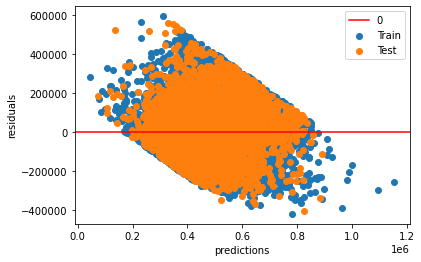

In [27]:
train_preds, test_preds, model_params = evaluate_model( X_train_scaled, X_test_scaled, y_train, y_test)

Our last model before our final model will compare bath-bed ratio, sqft_living, sqft_lot, floors, condition, grade, sqft_above, sqft_basement, zipcode, sqft_living15, and sqft_lot15. This is essentially our kitchen sink model and includes more information than the previous models. 

In [61]:
# Creating new column that is ratio of bathrooms to bedrooms
df_new['bbratio'] = df['bathrooms'] / df['bedrooms']

In [49]:
X = df_new[['bbratio', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode',
       'sqft_living15', 'sqft_lot15']]
Y = df_new['price']

In [50]:
cat_cols = ['zipcode']

In [51]:
X_train_scaled, X_test_scaled, y_train, y_test, feat_names = preprocess(X, Y, cat_cols)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     747.8
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:51:44   Log-Likelihood:            -1.8284e+05
No. Observations:               14403   AIC:                         3.658e+05
Df Residuals:                   14324   BIC:                         3.664e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.131e+05   6604.800    -17.118      0.0

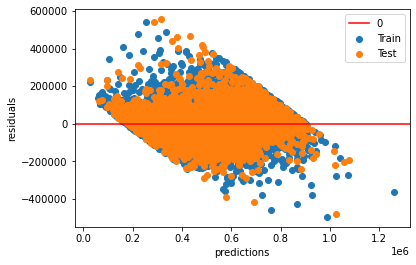

(array([455122.7399267 , 597626.14529496, 254318.80309668, ...,
        567088.51891894, 391386.05375131, 263463.81147277]),
 array([558850.05075318, 460635.58048028, 252593.69063591, ...,
        394228.46529275, 555664.92273069, 557206.64990151]),
 const   -113060.616884
 x1         7541.013259
 x2         3036.868932
 x3       466697.875451
 x4       319826.950879
              ...      
 x75      284874.945014
 x76      338801.300462
 x77       75269.226715
 x78      192850.968614
 x79       12211.352481
 Length: 80, dtype: float64)

In [52]:
evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

## Final Model

This is our final model. It compares 'bbratio', 'grade', 'condition', 'sqft_living', 'zipcode' with price. We chose this to be our final model as it has a similair R^2 score as our kitchen sink model but with less variables. Furthermore, we found the scaled and unscaled model to find both the highest correlation and to find the actual price changes respectively. This is the model we will advise our client on.

In [115]:
# First, we are going to create the scaled model
names = ['bbratio', 'grade', 'condition', 'sqft_living', 'zipcode']
X = df_new[names]
Y = df_new['price']

In [88]:
cat_cols = ['zipcode']

In [89]:
X_train_scaled, X_test_scaled, y_train, y_test, feat_names = preprocess(X, Y, cat_cols, scale=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     713.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:35:02   Log-Likelihood:            -1.8349e+05
No. Observations:               14403   AIC:                         3.671e+05
Df Residuals:                   14329   BIC:                         3.677e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.617e+04   6807.791    -11.188      0.0

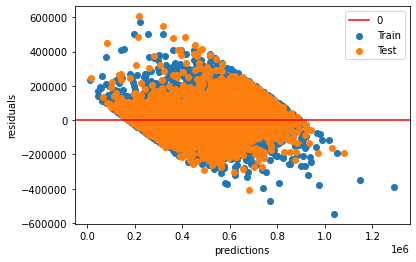

In [109]:
train_preds, test_preds, model_params = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test)

In [116]:
# Next, we are going to find the highest correlation within this model
name = ['const', *feat_names]

In [111]:
model_param_eval = pd.DataFrame(model_params)
model_param_eval['names'] = name

In [112]:
model_param_eval.sort_values(by=0, ascending=False).loc[~model_param_eval['names'].str.contains('ohe')]

,0,names
x73,755421.663008,sqft_living
x71,356472.416679,grade
x72,89731.913372,condition
x70,-20666.729024,bbratio
const,-76168.748130,const


In [113]:
# Here, we are going to make our unscaled model.
X_train, X_test, y_train, y_test, feat_names = preprocess(X, Y, cat_cols, scale = False)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     713.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:35:07   Log-Likelihood:            -1.8349e+05
No. Observations:               14403   AIC:                         3.671e+05
Df Residuals:                   14329   BIC:                         3.677e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.157e+05   9588.719    -32.924      0.0

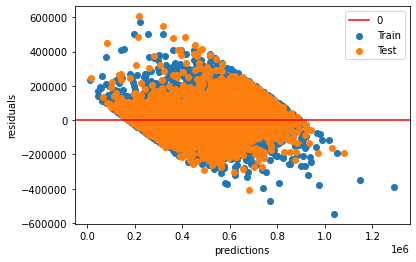

In [114]:
unstrain_preds, unstest_preds, unsmodel_params = evaluate_model(X_train, X_test, y_train, y_test)

In [117]:
# This next block of code will allow us to see how manipulating each variable can change the price
unsmodel_param_eval = pd.DataFrame(unsmodel_params)
unsmodel_param_eval['names'] = name

In [104]:
unsmodel_param_eval.sort_values(by=0, ascending=False).loc[~unsmodel_param_eval['names'].str.contains('ohe')]

,0,names
x71,44559.052085,grade
x72,22432.978343,condition
x73,106.247773,sqft_living
x70,-8445.845917,bbratio
const,-315701.724896,const


## Conclusion/ Summary

According to our final model, we would recommend our client to expand the size of the house as that has been the most consisent way of raising the overall price of the house. Increasing the sqft of the house by one unit will lead to the price increasing by $106. Our client can do this by adding another floor, more bathrooms or bedrooms, or just expanding the overall size of the house. Our models cannot predict how much the renovation will actually cost or if it is even worth doing; however, we see a strong correlation between sqft. and price. Another thing we would advise our client on is that not all of our models are enitrely accurate because we cut so much of the original data out. If we had more time, we would like to see how we could make our models accurate given our abbreivated dataset.